# 05 VISHMO - Visualization of horizontal motion fields with R

In [1]:
Sys.setenv(GDAL_DATA='/opt/anaconda/share/gdal')
Sys.setenv(PATH='/opt/anaconda/bin')

In [2]:
source('https://bitbucket.org/AndreStumpf/vishmo/raw/a54bd6f55450fd5bbfcd51843578b811686cc1b1/plotField.R')
source('https://bitbucket.org/AndreStumpf/vishmo/raw/a54bd6f55450fd5bbfcd51843578b811686cc1b1/getCrossSection.R')

In [3]:
#library('sp')

In [4]:
#library('rgdal')

In [5]:
user <- 'fbrito'
api <- 'AKCp2VokXW9QGM3RC3WUevapB1k1vSLgyuj5JvEidwTv1jQjTN21UQZuqS9JbP9jywr7o7DUC'

In [6]:
centerx <- 64.794
centery <- 26.5455

extent = 0.2

ulx <- centerx - extent
uly <- centery + extent
lrx <- centerx + extent
lry <- centery - extent

In [7]:
data <- c('BalochistanEW.tif', 'BalochistanNS.tif', 'BalochistanSRTM.tif', 'BalochistanImage.tif')
data_subset <- c('s_BalochistanEW.tif', 's_BalochistanNS.tif', 's_BalochistanSRTM.tif', 's_BalochistanImage.tif')

for (i in 1:length(data)) { 
    url <- paste('/vsicurl/https://', user, ':', api, '@store.terradue.com/api/fbrito/vishmo/', data[i], sep = '')
    cmd <- paste('gdal_translate -projwin', ulx, uly, lrx, lry, '-projwin_srs EPSG:4326', url, data_subset[i], sep = ' ')
    system(cmd)
}

In [8]:
EW <- data_subset[1]
NS <- data_subset[2]

### Displacement field with norm as background

Loading required package: sp
Loading required package: lattice
Loading required package: latticeExtra
Loading required package: RColorBrewer
rgdal: version: 1.2-15, (SVN revision 691)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.2, released 2017/09/15
 Path to GDAL shared files: /opt/anaconda/share/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.2-5 


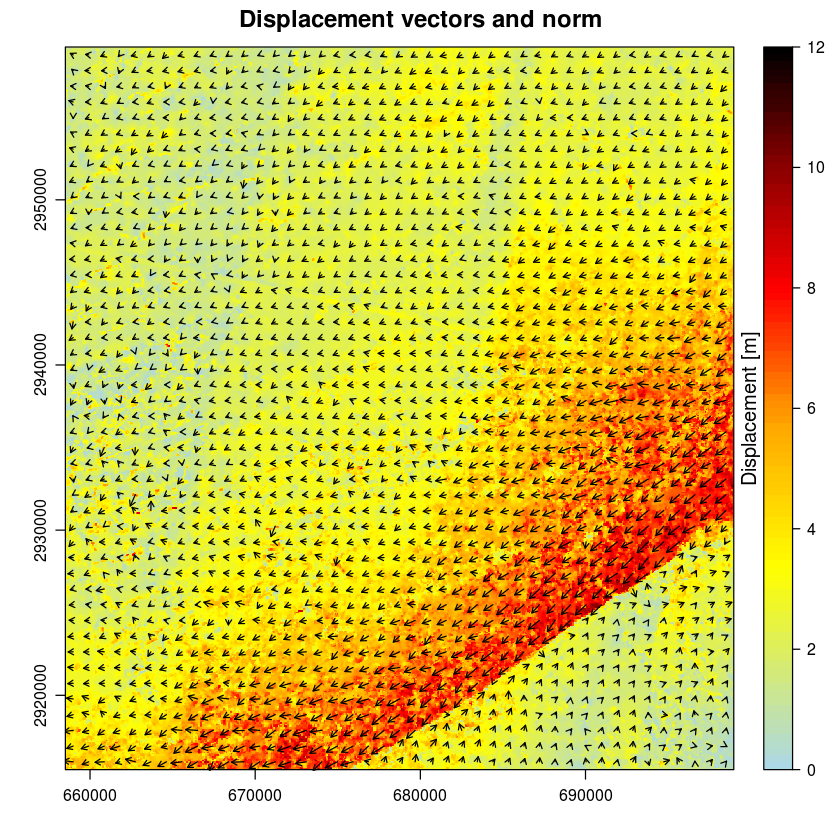

In [9]:
plotField(EW, NS, type="magnitude", max.displacement = 12, title='Displacement vectors and norm', col.bias=0.8)


### Displacement field with DEM in the background

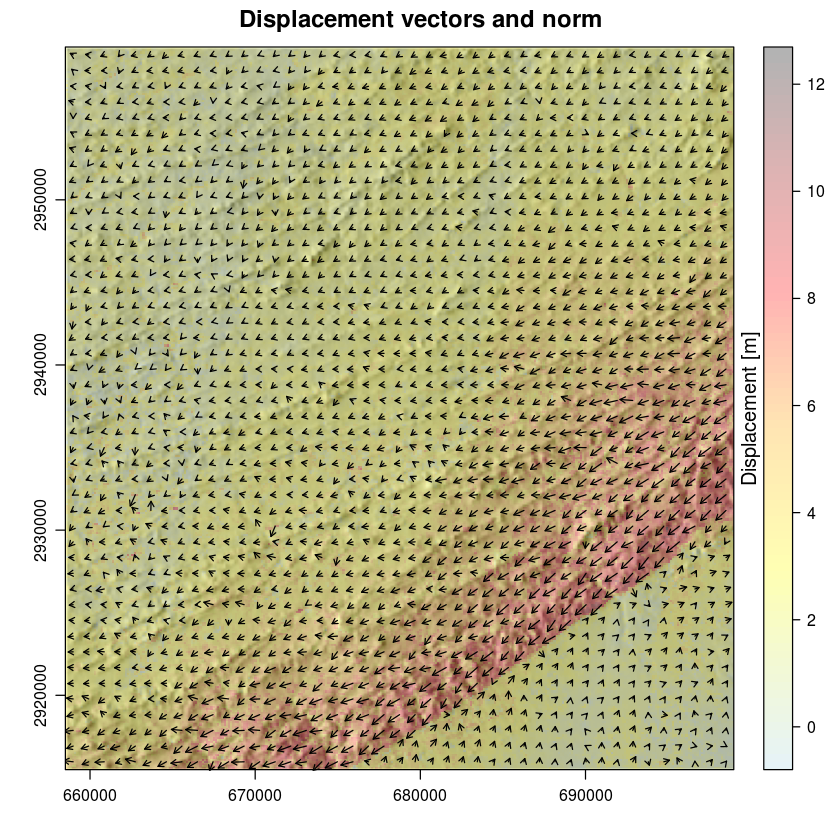

In [10]:
background <- data_subset[3]
plotField(EW, NS, background, type='hillshade', max.displacement = 12,title='Displacement vectors and norm', col.bias=0.8)

### Displacement field with transparent norm and hillshade in the background


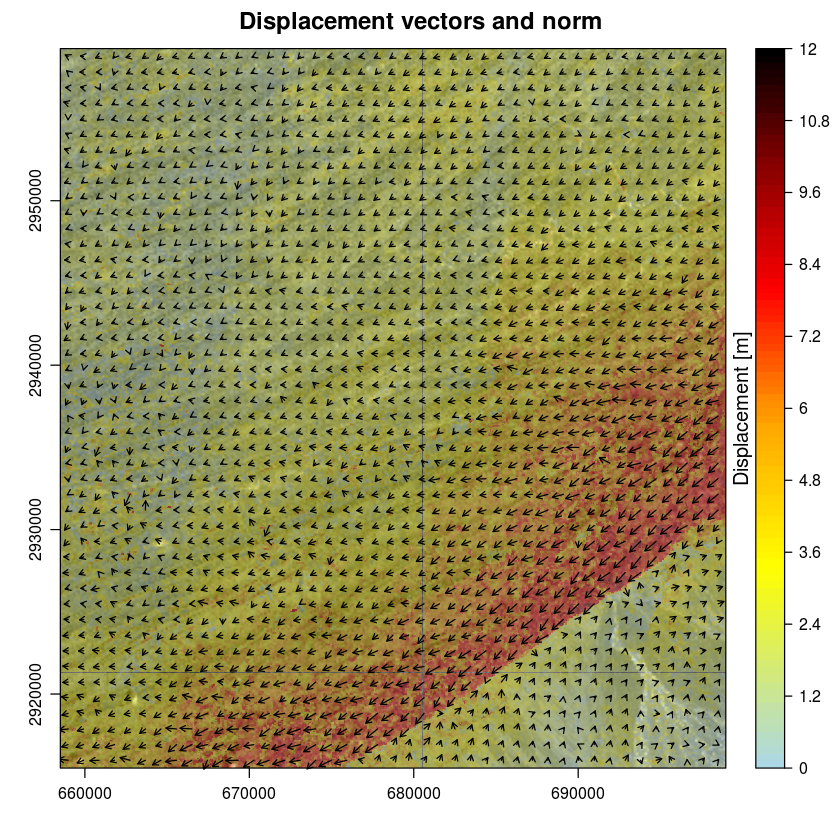

In [11]:
background <- data_subset[4]
plotField(EW, NS, background, type='image', max.displacement = 12, title='Displacement vectors and norm', col.bias=0.8)


### Draw fault line and get cross-section


In [12]:
 
subset.extent <-new("Extent"
                    , xmin = 676386.526826068
                    , xmax = 686673.594911795
                    , ymin = 2933603.72321038
                    , ymax = 2941354.90778539
)

fault.line <- plotField(EW, NS, type="draw", max.displacement = 12, col.bias=0.8,
              title='Draw fault line', extent=subset.extent)

ERROR: Error in nlayers(x): object 'bg.rast' not found


#### The following can be used to obtain a plot of the cross-sections.

In [13]:
getCrossSection(EW, NS, fault.line, cs.length = 1000, cs.spacing = 1000, extent=subset.extent)


ERROR: Error in xmin(field.stack): object 'field.stack' not found
